<a href="https://colab.research.google.com/github/BilalKhaliqWillis/BILAL-Assignment2/blob/main/BILAL_Assignment_2_Multilayer_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Assignment 2: Multilayer Perceptron
# Importing Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Loading and Inspecting the Wine Dataset
# Loading the wine dataset
wine = load_wine()

X = wine.data
y = wine.target

print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)
print("Class labels:", np.unique(y))

Feature matrix shape: (178, 13)
Target vector shape: (178,)
Class labels: [0 1 2]


In [3]:
# Selecting Features and Merging Classes
# Selecting the 1st and 5th features (index 0 and 4)
X = X[:, [0, 4]]

# Merge class 1 and class 2 into a single class (binary classification)
# Class 0 remains 0, Class 1 & 2 become 1
y = np.where(y == 0, 0, 1)

print("Selected feature shape:", X.shape)
print("New class labels:", np.unique(y))

Selected feature shape: (178, 2)
New class labels: [0 1]


In [4]:
# Standardizing the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Mean after standardization:", X_scaled.mean(axis=0))
print("Std after standardization:", X_scaled.std(axis=0))

Mean after standardization: [-8.38280756e-16 -3.99181312e-17]
Std after standardization: [1. 1.]


In [5]:
# Train–Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (124, 2)
Testing set shape: (54, 2)


In [6]:
# Defining the Perceptron Model
class Perceptron:
    """
    Simple Perceptron for Binary Classification
    """

    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.costs = []

    def activation(self, z):
        return np.where(z >= 0, 1, 0)

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.n_iters):
            linear_output = np.dot(X, self.weights) + self.bias
            y_pred = self.activation(linear_output)

            # Perceptron update rule
            errors = y - y_pred
            self.weights += self.lr * np.dot(X.T, errors)
            self.bias += self.lr * errors.sum()

            # Cost (sum of squared errors)
            cost = np.sum(errors ** 2)
            self.costs.append(cost)

            if i % 100 == 0:
                print(f"Iteration {i}: Cost = {cost}")

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation(linear_output)

In [7]:
# Training the Model
perceptron = Perceptron(learning_rate=0.01, n_iters=1000)
perceptron.fit(X_train, y_train)

Iteration 0: Cost = 40
Iteration 100: Cost = 31
Iteration 200: Cost = 21
Iteration 300: Cost = 30
Iteration 400: Cost = 31
Iteration 500: Cost = 24
Iteration 600: Cost = 30
Iteration 700: Cost = 27
Iteration 800: Cost = 27
Iteration 900: Cost = 27


In [8]:
# Testing and Evaluating the Model
# Predictions
y_pred = perceptron.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7777777777777778

Classification Report:
              precision    recall  f1-score   support

           0       0.61      1.00      0.76        19
           1       1.00      0.66      0.79        35

    accuracy                           0.78        54
   macro avg       0.81      0.83      0.78        54
weighted avg       0.86      0.78      0.78        54



In [9]:
# Decision Boundary Function
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )

    grid = np.c_[xx.ravel(), yy.ravel()]
    preds = model.predict(grid)
    preds = preds.reshape(xx.shape)

    plt.contourf(xx, yy, preds, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

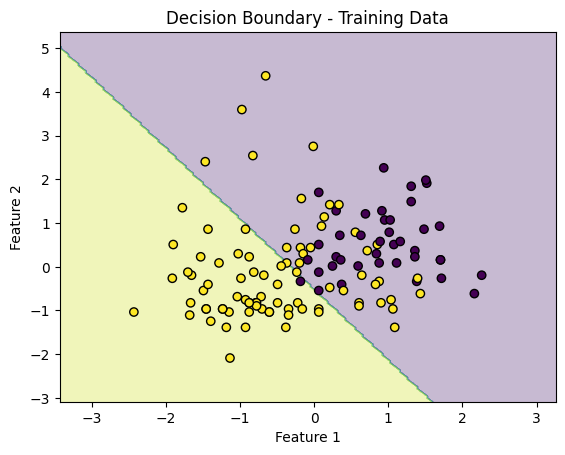

In [11]:
# Plotting Decision Boundary - Training Data
plot_decision_boundary(
    X_train, y_train, perceptron,
    title="Decision Boundary - Training Data"
)

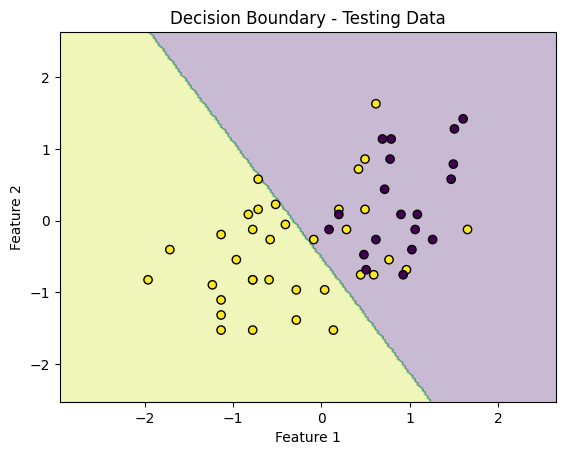

In [12]:
# Plotting Decision Boundary - Testing Data
plot_decision_boundary(
    X_test, y_test, perceptron,
    title="Decision Boundary - Testing Data"
)

In [15]:
# Discussion of Performance
#Performance Discussion

"""The perceptron successfully separated the two merged classes by using a linear
decision boundary. Because we only two features used, the model have remained
interpretable however limited in complexity.

The accuracy shows us good performance for a simple linear classifier.
However, the perceptron struggles with non-linearly separable data, which could
be improved by using a multilayer perceptron with hidden layers."""

'The perceptron successfully separated the two merged classes by using a linear\ndecision boundary. Because we only two features used, the model have remained\ninterpretable however limited in complexity.\n\nThe accuracy shows us good performance for a simple linear classifier.\nHowever, the perceptron struggles with non-linearly separable data, which could\nbe improved by using a multilayer perceptron with hidden layers.'